In [25]:
#import all of the neccessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_regression
import random
random.seed(16395336)
my_seed = np.round(random.random()*100)
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
print(my_seed)

68.0


In [26]:
arts = pd.read_csv("theArt.csv") #Load art data file
users = pd.read_csv("theData.csv", header = None) #Load user data file

In [27]:
arts #View the arts dataframe

,Number,Artist,Title,Style,Year,"Source (1 = classical, 2 = modern, 3 = nonhuman)","computerOrAnimal (0 = human, 1 = computer, 2 = animal)","Intent (0 = no, 1 = yes)"
0,1,Durer,Self-Portrait,Northern Renaissance,1500,1,0,1
1,2,de Vinci,Mona Lisa,Renaissance,1503,1,0,1
2,3,Michelangelo,The Creation of Adam,Italian Renaissance,1512,1,0,1
3,4,Bruegel,Tower of Babel,Dutch and Flemish Renaissance,1563,1,0,1
4,5,Hals,Laughing Cavalier,Baroque,1624,1,0,1
...,...,...,...,...,...,...,...,...
86,87,Turtle,Untitled,Abstract,2017,3,2,0
87,88,Snake,Untitled,Abstract,2017,3,2,0
88,89,Hippo,Untitled,Abstract,2017,3,2,0
89,90,Rhino,Untitled,Abstract,2017,3,2,0


In [28]:
users.head() #View the users data

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,7,6,2,6,3,3,5,4,6,6,...,5.0,2.0,3.0,4.0,19.0,2.0,3.0,0.0,2.0,2.0
1,6,6,5,6,5,5,4,6,2,5,...,4.0,3.0,2.0,4.0,20.0,1.0,6.0,1.0,3.0,1.0
2,7,6,6,6,5,6,7,6,5,5,...,4.0,1.0,2.0,2.0,18.0,2.0,2.0,1.0,1.0,2.0
3,6,6,5,7,6,5,4,6,6,6,...,5.0,3.0,5.0,4.0,21.0,2.0,5.0,1.0,3.0,0.0
4,7,5,5,5,6,5,5,7,6,7,...,3.0,4.0,3.0,3.0,22.0,1.0,3.0,0.0,3.0,0.0


In [29]:
#Convert data to numpy arrays to apply material learnt in class
art = arts.to_numpy()
user = users.to_numpy()

**Q1. Is Classical Art more liked than Modern Art?**

In [30]:
#We first create a table with all of the information we need

In [31]:
arts.rename(columns = {'Number' : 'number', 'Artist' : 'artist',"Title" : 'title',
                       'Style': 'style', 'Year': 'year', 
                       'Source (1 = classical, 2 = modern, 3 = nonhuman)' 
                       : 'source', 'computerOrAnimal (0 = human, 1 = computer, 2 = animal)':
                       'computer/animal', 'Intent (0 = no, 1 = yes)' : 'intent'}, inplace = True)

In [32]:

classical = arts[arts['source'] == 1]
classical.tail()


,Number,Artist,title,style,year,source,computer/animal,intent
30,31,Courbet,The Stonebreakers,Social Realism,1850,1,0,1
31,32,Hunt,The Awakening Conscience,Orientalist / Pre-Raphaelites,1853,1,0,1
32,33,Manet,Olympia,Impressionism / Realism,1863,1,0,1
33,34,Bouquereau,Washerwomen of Fouesnant,Neoclassicism,1869,1,0,1
34,35,Bouquereau,Birth of Venus,Realism,1879,1,0,1


In [33]:
modern = arts[arts['source'] == 2]
# modern.head()
modern.tail()

,Number,Artist,title,style,year,source,computer/animal,intent
65,66,Xiaodong,Voiture de police avec pigeons,Neo-Realist,1993,2,0,1
66,67,Rutu,Riding Death in My Sleep,Surrealism,2002,2,0,1
67,68,Marshall,7am Sunday Morning,Contemporary Art,2003,2,0,1
68,69,Taaffe,Large Cairene Window,Process - Based Abstraction,2010,2,0,1
69,70,Fathi,Untitled,Hurufiyya Movement,2013,2,0,1


In [34]:
classical_users = users.iloc[:, 0:35]


In [35]:
modern_users = users.iloc[:, 35:70]

In [36]:
classical_mean = classical_users.mean().mean()
modern_mean = modern_users.mean().mean()
classical_median = classical_users.median().median()
modern_median = modern_users.median().median()
print("""The mean rating for classical music is {:2f}. 
      The mean rating for modern music is 
      {:2f}""".format(classical_mean,modern_mean))
print("""The median rating for classical music is {:2f}. 
      The median rating for modern music is 
      {:2f}""".format(classical_median,modern_median))
U, p = mannwhitneyu(classical_users, modern_users)
p = p.mean()
print("P-value: {}".format(p))

The mean rating for classical music is 4.741524. 
      The mean rating for modern music is 
      4.256571
The median rating for classical music is 5.000000. 
      The median rating for modern music is 
      4.000000
P-value: 0.10917592963086452


In [37]:
from scipy.stats import mannwhitneyu

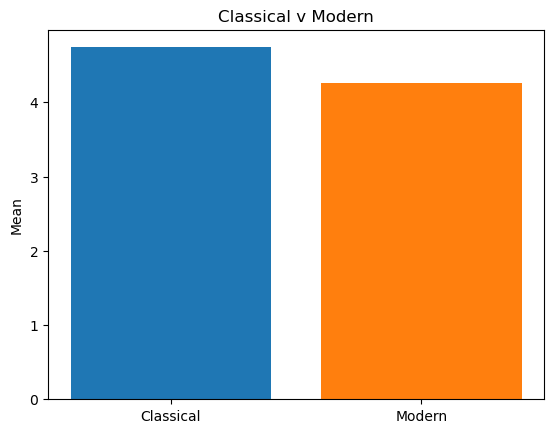

In [38]:
plt.bar("Classical", classical_mean)
plt.bar("Modern", modern_mean)
plt.title("Classical v Modern")
plt.ylabel("Mean")
plt.show()

In [39]:
# # Import necessary libraries
# from scipy.stats import mannwhitneyu


# # Extract the ratings or preferences for each group
# group_a_ratings = classical_users
# group_b_ratings = modern_users

# # Perform the Mann-Whitney U test
# statistic, p_value = mannwhitneyu(group_a_ratings, group_b_ratings)

# val = p_value.mean()
# print(val)

# if val < 0.05:
#     print("The difference in ratings or preferences between group A and group B is statistically significant.")
# else:
#     print("The difference in ratings or preferences between group A and group B is not statistically significant.")

**Q2. Is there a difference in the preference ratings for modern art vs. non-human (animals and
computers) generated art?**

In [40]:
#We have all of the prefer ratings for modern
#We need to create a table for the non_human
nonhuman = arts[arts['source'] == 3]
nonhuman.head()
# nonhuman.tail()


,Number,Artist,title,style,year,source,computer/animal,intent
70,71,Computer,Flower,Abstract,2017,3,1,0
71,72,Computer,Cyclone,Abstract,2017,3,1,0
72,73,Computer,Spiral,Abstract,2017,3,1,0
73,74,Computer,Dress,Abstract,2017,3,1,0
74,75,Computer,Scream,Abstract,2017,3,1,0


In [41]:
nonhuman_users = users.iloc[:, 70:91]
nonhuman_mean = nonhuman_users.mean().mean()
nonhuman_median = nonhuman_users.median().median()
print("""The mean rating for nonhuman art is {:2f}. 
      The mean rating for modern art is 
      {:2f}""".format(nonhuman_mean,modern_mean))
print("""The median rating for nonhuman art is {:2f}. 
      The median rating for modern art is 
      {:2f}""".format(nonhuman_median,modern_median))

The mean rating for nonhuman art is 3.308095. 
      The mean rating for modern art is 
      4.256571
The median rating for nonhuman art is 3.000000. 
      The median rating for modern art is 
      4.000000


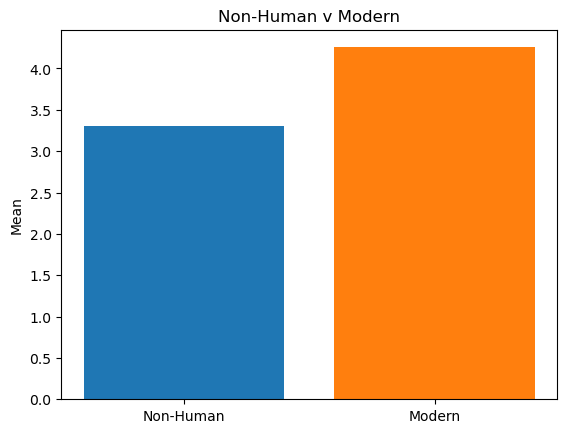

In [42]:
plt.bar("Non-Human", nonhuman_mean)
plt.bar("Modern", modern_mean)
plt.title("Non-Human v Modern")
plt.ylabel("Mean")
plt.show()

**Q3. Do women give higher art preference ratings than men?**

In [43]:
#We need to first create tables of the art 
#preference ratings for men and women. Then we can 
#use sample statistics to determine

men_data = users[users.iloc[:,216] == 1]
men_preferences = men_data.iloc[:, :91]

women_data = users[users.iloc[:,216] == 2]
women_preferences = women_data.iloc[:, :91]

men_mean = men_preferences.mean().mean()
women_mean = women_preferences.mean().mean()
men_median = men_preferences.median().median()
women_median = women_preferences.median().median()
print("""The mean rating for men preferences is {:2f}. 
      The mean rating for women preferences is 
      {:2f}""".format(men_mean,women_mean))
print("""The median rating for men preferences music is {:2f}. 
      The median rating for women preferences is 
      {:2f}""".format(men_median,women_median))


The mean rating for men preferences is 4.214459. 
      The mean rating for women preferences is 
      4.225735
The median rating for men preferences music is 4.000000. 
      The median rating for women preferences is 
      4.000000


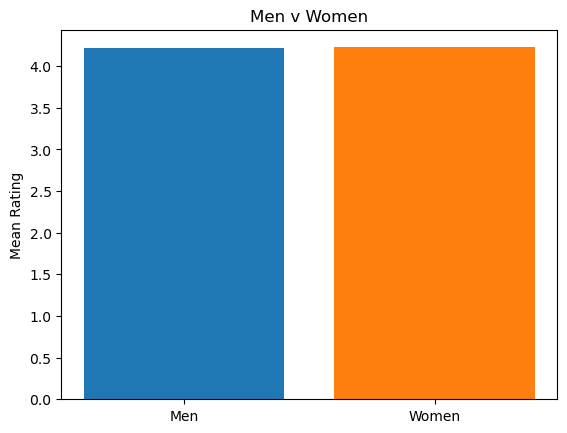

In [44]:
plt.bar("Men", men_mean)
plt.bar("Women", women_mean)
plt.title("Men v Women")
plt.ylabel("Mean Rating")
plt.show()

**Q4. Is there a difference in the preference ratings of users with some art background (some art
education) vs. none?**

In [45]:
#We need to first create tables of the art 
#preference ratings for some and none. Then we can 
#use sample statistics to determine

some = users[users.iloc[:,218] != 0]
some_preferences = some.iloc[:, :91]

none = users[users.iloc[:,218] == 0]
none_preferences = none.iloc[:, :91]

some_mean = some_preferences.mean().mean()
none_mean = none_preferences.mean().mean()
some_median = some_preferences.median().median()
none_median = none_preferences.median().median()
print("""The mean rating for some preferences is {:2f}. 
      The mean rating for none preferences is 
      {:2f}""".format(some_mean,none_mean))
print("""The median rating for some preferences music is {:2f}. 
      The median rating for none preferences is 
      {:2f}""".format(some_median,none_median))



The mean rating for some preferences is 4.188134. 
      The mean rating for none preferences is 
      4.305781
The median rating for some preferences music is 4.000000. 
      The median rating for none preferences is 
      4.000000


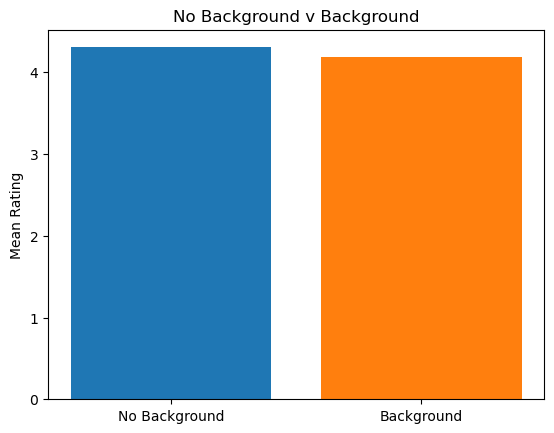

In [46]:
plt.bar("No Background", none_mean)
plt.bar("Background", some_mean)
plt.title("No Background v Background")
plt.ylabel("Mean Rating")
plt.show()

**Q5. Build a regression model to predict art preference ratings from energy ratings only. Make sure
to use cross-validation methods to avoid overfitting and characterize how well your model
predicts art preference ratings.**

In [47]:
 # SciKit Learn packages
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [48]:
from sklearn.linear_model import Ridge #To do ridge regression
from sklearn.metrics import mean_squared_error #To evaluate model with function
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

In [49]:
X =  users.iloc[:, 91:182].mean(axis = 0)
Y =  users.iloc[:, 0:91].mean(axis = 0)

X

91     3.866667
92     4.136667
93     3.350000
94     3.386667
95     4.080000
         ...   
177    4.086667
178    4.286667
179    3.603333
180    4.246667
181    3.950000
Length: 91, dtype: float64

In [50]:
x = X.to_numpy().reshape(-1,1)
y = Y.to_numpy().reshape(-1,1)

xTrain, xTest , yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state = int(my_seed))
    

#%% 5: Student performance prediction with ridge regression


#Normal linear regression
model = LinearRegression().fit(xTrain,yTrain)
pred1 = model.predict(xTest)
print(mean_squared_error(yTest, pred1))    
print(mean_absolute_error(yTest, pred1))   # Calculate the test MSE
print(r2_score(yTest, pred1))





0.5150295878397185
0.5684196513658762
0.10327737805055481


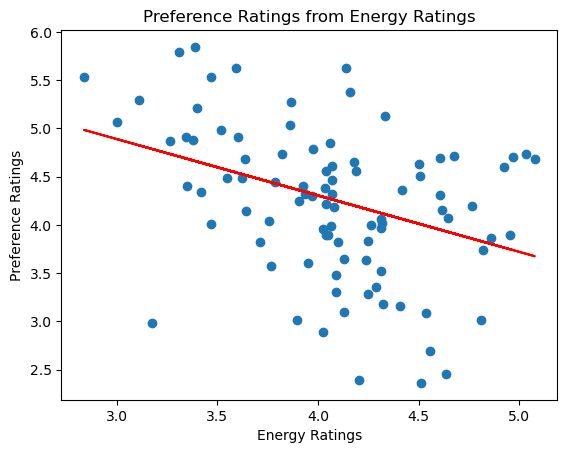

In [51]:
plt.scatter(X, Y)
plt.plot(xTrain, model.predict(xTrain), color = "red")
plt.title("Preference Ratings from Energy Ratings")
plt.ylabel("Preference Ratings")
plt.xlabel("Energy Ratings")
plt.show()


**Q6. Build a regression model to predict art preference ratings from energy ratings and
demographic information. Make sure to use cross-validation methods to avoid overfitting and
comment on how well your model predicts relative to the “energy ratings only” model.**

In [52]:
q6 = pd.concat([users.iloc[:, 0:91],users.iloc[:, 91:182], users.iloc[:, 215:221]], axis = 1).dropna()
X =  q6.iloc[:, 91:].to_numpy() 
Y = q6.iloc[:, 0:91]


In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

y = Y.to_numpy() 

###
validate = KFold(n_splits=8 , random_state = int(my_seed), shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='r2',
                         cv=validate, n_jobs=-1)
# print(scores)
#view RMSE
print(f"avg R2 {(np.mean(np.absolute(scores)))}")
# print(f"Max R2: {np.absolute(scores[np.argmax((np.absolute(scores)))])}")
# plt.plot(range(1,11),np.abs(scores))



avg R2 0.7413983160635582


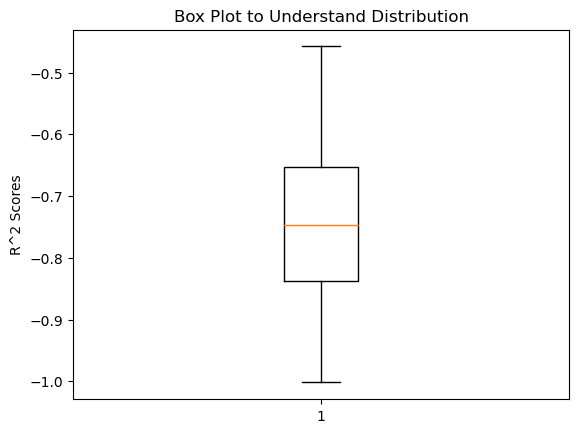

In [54]:
plt.boxplot(scores)
plt.title("Box Plot to Understand Distribution")
plt.ylabel("R^2 Scores")
plt.show()



In [ ]:

plt.plot(xTrain, model.predict(xTrain), color = "red")
plt.title("Preference Ratings from Energy Ratings")
plt.ylabel("Preference Ratings")
plt.xlabel("Energy Ratings")
plt.show()

**Q7.Considering the 2D space of average preference ratings vs. average energy rating (that
contains the 91 art pieces as elements), how many clusters can you – algorithmically - identify in this space? Make sure to comment on the identity of the clusters – do they correspond to particular types of art?**


In [55]:
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from scipy.special import expit # this is the logistic sigmoid function
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [56]:
pref = users.iloc[:, 0:91].mean(axis=0)
energy = users.iloc[:, 91:182].mean(axis=0)
scat_data = np.column_stack((energy, pref))

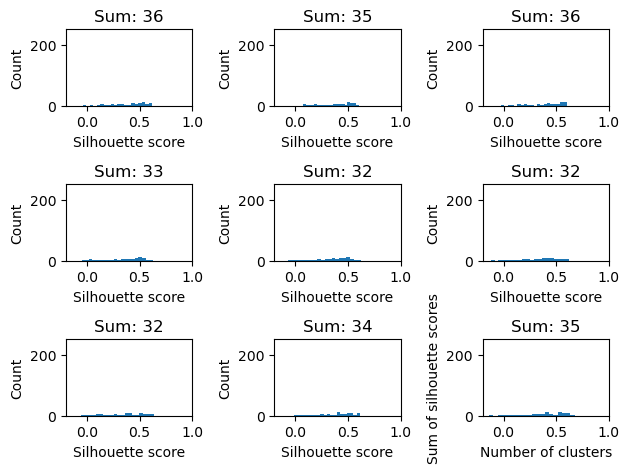

In [57]:
# Init:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
sSum = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans for each k:
for ii in range(2, numClusters+2): # Loop through each cluster (from 2 to 10)
    kMeans = KMeans(n_clusters = int(ii)).fit(scat_data) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(scat_data,cId) # compute the mean silhouette coefficient of all samples
    sSum[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(sSum[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot 

# Plot the sum of the silhouette scores as a function of the number of clusters, to make it clearer what is going on
plt.plot(np.linspace(2,numClusters,9),sSum)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()


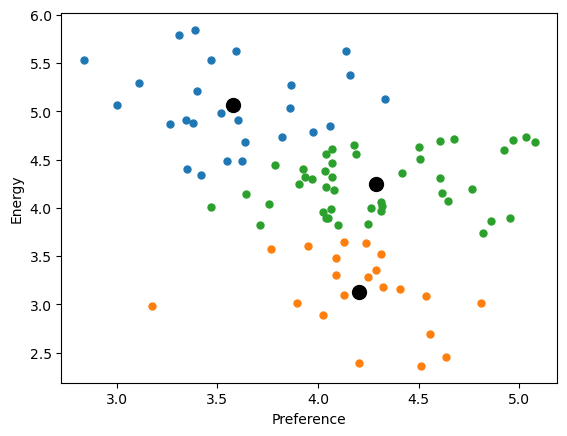

In [64]:

from matplotlib.colors import Normalize
# kMeans:
numClusters = 3
kMeans = KMeans(n_clusters = numClusters).fit(scat_data) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_ 

# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(scat_data[plotIndex,0],scat_data[plotIndex,1],'o',markersize=5)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=10,color='black')  
    plt.xlabel('Preference')
    plt.ylabel('Energy')



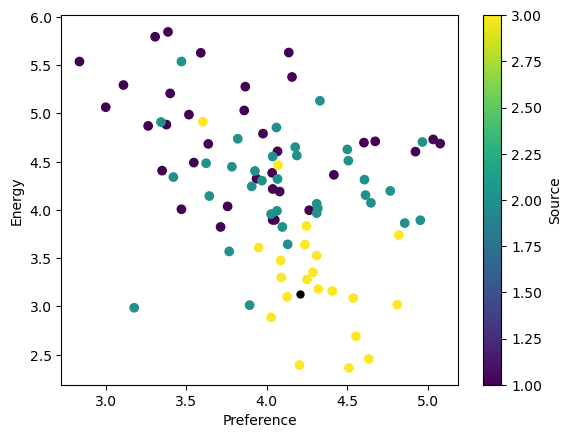

In [65]:
from matplotlib.colors import Normalize
scatter = plt.scatter(energy, pref, c= arts['source'])
plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
plt.xlabel('Preference')
plt.ylabel('Energy')
cbar = plt.colorbar(scatter)
cbar.set_label('Source')
    
# Show the plot
plt.show()

**8) Considering only the first principal component of the self-image ratings as inputs to a regression model – how well can you predict art preference ratings from that factor alone?**

In [67]:
q8 = pd.concat([users.iloc[:, 0:91], users.iloc[:, 205:215]], axis = 1).dropna()
self_ratings = q8.iloc[:, 91:].transpose()
art_pref = q8.iloc[:, 0:91]

In [68]:

# Apply PCA to the input data
pca = PCA(n_components=1)
pca.fit_transform(self_ratings)
# Use the first principal component as the input to the regression model
X_pca = pca.components_.reshape(-1, 1)
x = X_pca
y = art_pref.mean(axis = 1)
xTrain, xTest , yTrain, yTest = train_test_split(x, y, test_size=0.3 ,random_state = int(my_seed))
    


model = LinearRegression().fit(xTrain,yTrain)
pred1 = model.predict(xTest)
print(mean_squared_error(yTest, pred1))    
print(mean_absolute_error(yTest, pred1))  
print(r2_score(yTest, pred1))

0.4759935878404072
0.4620968903961054
0.053980784499026546


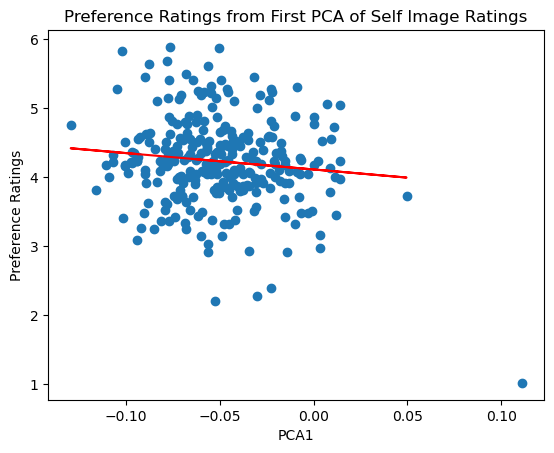

In [69]:
plt.scatter(x, y)
plt.plot(xTrain, model.predict(xTrain), color = "red")
plt.title("Preference Ratings from First PCA of Self Image Ratings")
plt.ylabel("Preference Ratings")
plt.xlabel("PCA1")
plt.show()

**9) Consider the first 3 principal components of the “dark personality” traits – use these as inputs to a regression model to predict art preference ratings. Which of these components significantly predict art preference ratings? Comment on the likely identity of these factors (e.g. narcissism, manipulativeness, callousness, etc.)**


Ave r2 {(np.mean(np.absolute(scores)))}


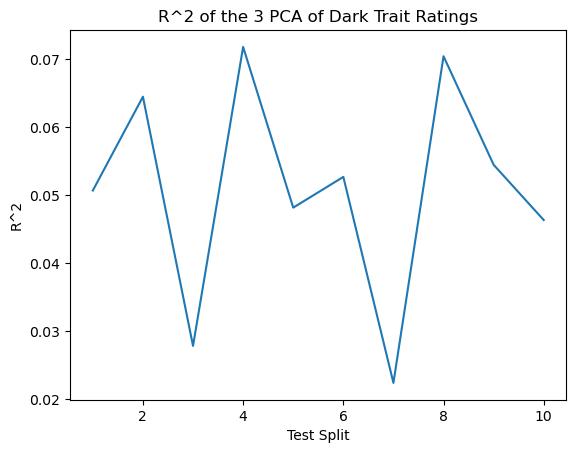

In [85]:
q9 = pd.concat([users.iloc[:, 0:91], users.iloc[:, 182:194]], axis = 1).dropna()
art_pref = q9.iloc[:, 0:91]
dark_ratings = users.iloc[:,np.arange(182,194)].dropna()
pca_1 = PCA(n_components=3)
X_pca = pca_1.fit_transform(dark_ratings)

splits = KFold(n_splits=10, random_state= int(my_seed), shuffle=True)
model = LinearRegression()

scores = cross_val_score(model, X_pca, art_pref, scoring='r2',
                         cv=splits, n_jobs=-1)

print("Ave r2 {(np.mean(np.absolute(scores)))}")
plt.title("R^2 of the 3 PCA of Dark Trait Ratings")
plt.ylabel("R^2")
plt.xlabel("Test Split")
plt.plot(range(1,11),np.abs(scores))


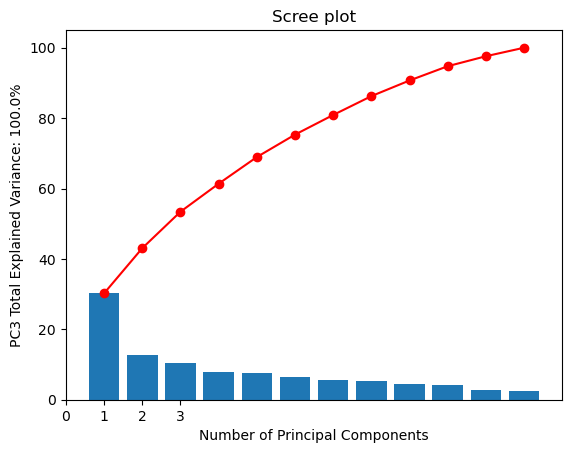

In [86]:
pca = PCA()
pca.fit_transform(dark_ratings)
ratio = pca.explained_variance_ratio_ * 100
plt.bar(np.arange(len(ratio)) + 1, ratio)
plt.plot(np.arange(len(ratio)) + 1, ratio.cumsum(), c="red", marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel(f"Total explained variance: {sum(pca.explained_variance_ratio_)}")
plt.ylabel('PC{} Total Explained Variance: {}%'.format(len(pca_1.explained_variance_ratio_), round(100 * sum(pca.explained_variance_ratio_), 2)))
plt.xticks(np.arange(0, len(pca_1.explained_variance_ratio_)+1, 1.0))
plt.title("Scree plot")
plt.show(block=False)

In [87]:

n= pca.components_.shape[0]
imp = [np.abs(pca.components_[i]).argmax() for i in range(n)]
initialNames = [str(x) for x in np.arange(1,13)]
importantNames = [initialNames[imp[i]] for i in range(n)]
dictionary = {'Principal Component {}'.format(i): importantNames[i] for i in range(n)}

df = pd.DataFrame(dictionary.items())
#1,5 and 8 were the most impactful
maps={"1": "I tend to manipulate others to get my way",
       "5":"I tend to lack remorse",
       "8":"I tend to be cynical" }
df.iloc[:,1]=df.iloc[:,1].map(maps)
print(df)

                         0                                          1
0    Principal Component 0  I tend to manipulate others to get my way
1    Principal Component 1                     I tend to lack remorse
2    Principal Component 2                       I tend to be cynical
3    Principal Component 3                                        NaN
4    Principal Component 4                                        NaN
5    Principal Component 5                                        NaN
6    Principal Component 6                                        NaN
7    Principal Component 7                                        NaN
8    Principal Component 8                                        NaN
9    Principal Component 9                     I tend to lack remorse
10  Principal Component 10                                        NaN
11  Principal Component 11                                        NaN


**10) Can you determine the political orientation of the users (to simplify things and avoid gross class imbalance issues, you can consider just 2 classes: “left” (progressive & liberal) vs. “non- left” (everyone else)) from all the other information available, using any classification model of your choice? Make sure to comment on the classification quality of this model.**

/var/folders/y_/dhjcc_p14_qd_gv2dhwr7bkc0000gn/T/ipykernel_39010/3894412449.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/Users/suvirwadhwa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.54


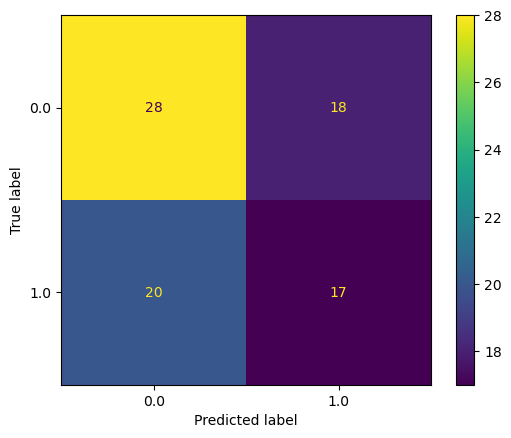

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

q10 = users.dropna()
X = q10.drop(217, axis = 1).mean(axis = 1)
X = q10.iloc[: , :204].mean(axis = 1)
political = q10.iloc[: , 217]
political = political.replace([1,2] ,0) #  0 is left
political = political.replace([3, 4, 5, 6] ,1) #1 is nonleft
y = political.to_numpy().reshape(276,1)
# Load and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = int(my_seed))

# Convert the data to NumPy arrays
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)
y_train = y_train
y_test = y_test

# Create a random forest classifier with 100 trees
model = RandomForestClassifier(n_estimators=200)

# Train the model on the training data
model.fit(X_train, y_train)


# Test the model on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()



**Extra Credit: Compare the preference rating differences between women, men and non-binary.**

The mean preference rating for men preferences is 4.214459. 
      The mean preference rating for women preferences is 
      4.225735. The mean preference rating for Non Binary is 
      4.545788.
The median preference rating for men preferences music is 4.000000. 
      The median preference rating for women preferences is 
      4.000000. The median preference rating for Non Binary is 
      4.500000


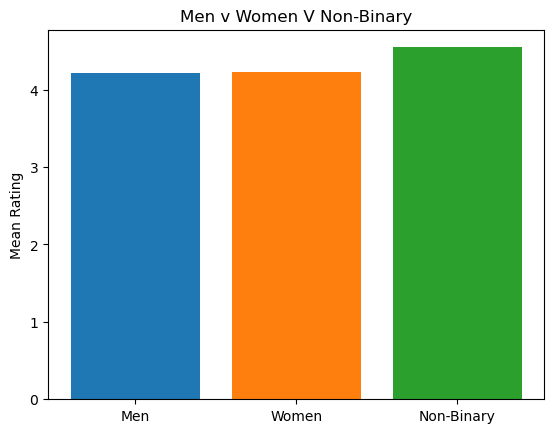

In [94]:
men_data = users[users.iloc[:,216] == 1]
men_preferences = men_data.iloc[:, :91]


women_data = users[users.iloc[:,216] == 2]
women_preferences = women_data.iloc[:, :91]

non_binary_data = users[users.iloc[:,216] == 3]
non_binary_preferences = non_binary_data.iloc[:, :91]

men_mean = men_preferences.mean().mean()
women_mean = women_preferences.mean().mean()
non_binary_mean = non_binary_preferences.mean().mean()
men_median = men_preferences.median().median()
women_median = women_preferences.median().median()
non_binary_median = non_binary_preferences.median().median()

print("""The mean preference rating for men preferences is {:2f}. 
      The mean preference rating for women preferences is 
      {:2f}. The mean preference rating for Non Binary is 
      {:2f}.""".format(men_mean,women_mean, non_binary_mean))
print("""The median preference rating for men preferences music is {:2f}. 
      The median preference rating for women preferences is 
      {:2f}. The median preference rating for Non Binary is 
      {:2f}""".format(men_median,women_median, non_binary_median))

plt.bar("Men", men_mean)
plt.bar("Women", women_mean)
plt.bar("Non-Binary", non_binary_mean)
plt.title("Men v Women V Non-Binary")
plt.ylabel("Mean Rating")
plt.show()